In [1]:
import numpy as np
import pandas as pd
import pickle

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
with open('temp_and_stress.pick', 'rb') as f:
    temps, stresses = pickle.load(f)

In [3]:
temp = pd.DataFrame((temps), columns=['temperature'])
stress = pd.DataFrame(stresses, columns=['xx', 'yy', 'zz', 'yz', 'xz', 'xy'])

In [4]:
kwargs = {'linewidth': 2}

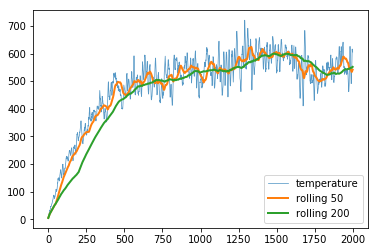

In [5]:
for window in (50, 200):
    temp[f'rolling {window}'] = temp.temperature.rolling(window, 0).mean()

fig, ax = plt.subplots()
temp.iloc[:, 0].plot(ax=ax,linewidth=.75, legend=True, alpha=.75)
temp.iloc[:, 1:].plot(ax=ax, linewidth=2)
plt.show() # for gitlab

In [6]:
def p(stress):
    return -1/3 * np.sum(stress[:3])

pressure = stress.apply(p, axis=1)

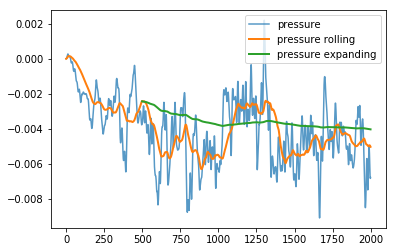

In [7]:
df = pd.DataFrame()
df['pressure'] = pressure
df['pressure rolling']= pressure.rolling(window=100, min_periods=0).mean()
df['pressure expanding'] = pressure.expanding(min_periods=500).mean()

fix, ax = plt.subplots()
df.pressure.plot(ax=ax, legend=True, alpha=.75)
df.iloc[:, 1:].plot(ax=ax, linewidth=2)
plt.show() # for gitlab

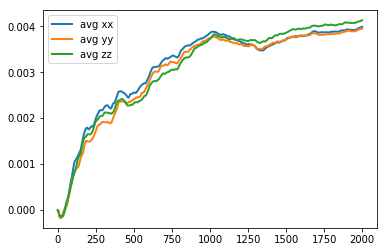

In [8]:
df3 = pd.DataFrame()
df3 = df3.append(stress.iloc[:, :3])
for col in df3.columns:
    df3[f'avg {col}'] = df3[col].expanding(0).mean()
df3.iloc[:, 3:].plot(linewidth=2)
plt.show() # for gitlab